## 8.1 本章简介
恭喜你，经过前面七章内容的学习，你已经逐步熟悉了PyTorch的使用，能够定义和修改自己的模型，学会了常用的训练技巧，并通过可视化辅助PyTorch的使用。

PyTorch的强大并不仅局限于自身的易用性，更在于开源社区围绕PyTorch所产生的一系列工具包（一般是Python package）和程序，这些优秀的工具包极大地方便了PyTorch在特定领域的使用。比如对于计算机视觉，有TorchVision、TorchVideo等用于图片和视频处理；对于自然语言处理，有torchtext；对于图卷积网络，有PyTorch Geometric ······。这里只是举例，每个领域还有很多优秀的工具包供社区使用。这些工具包共同构成了PyTorch的生态（EcoSystem）。

PyTorch生态很大程度助力了PyTorch的推广与成功。在特定领域使用PyTorch生态中的工具包，能够极大地降低入门门槛，方便复现已有的工作。比如我们在讨论模型修改时候就用到了torchvision中预定义的resnet结构，而不需要自己重新编写。同时，PyTorch生态有助于社区力量的加入，共同为社区提供更有价值的内容和程序，这也是开源理念所坚持的价值。

在后面的内容中，我们会逐步介绍PyTorch生态在图像、视频、文本等领域中的发展，针对某个领域我们选择其中有代表性的一个工具包进行详细介绍，主要包括工具包的作者或其所在机构、数据预处理工具（这块可能再引入第三方工具包）、数据扩增、常用模型结构的预定义、预训练模型权重、常用损失函数、常用评测指标、封装好的训练&测试模块，以及可视化工具。这些内容也是我们在使用对应工具包时会用到的。读者可以根据自身需要重点学习，对于自己研究所不涉及的工具包，可以只做了解，需要使用时再来学习。

**注**：

本章内容会不断更新，欢迎大家在issue中提出宝贵建议，或者直接pull request~

## 8.2 torchvision

  PyTorch之所以会在短短的几年时间里发展成为主流的深度学习框架，除去框架本身的优势，还在于PyTorch有着良好的生态圈。在前面的学习和实战中，我们经常会用到torchvision来调用预训练模型，加载数据集，对图片进行数据增强的操作。在本章我们将给大家简单介绍下torchvision以及相关操作。

  经过本节的学习，你将收获：

  - 了解torchvision
  - 了解torchvision的作用

  ### 8.2.1 torchvision简介

  " The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision. "

  正如引言介绍的一样，我们可以知道torchvision包含了在计算机视觉中常常用到的数据集，模型和图像处理的方式，而具体的torchvision则包括了下面这几部分，带 ***** 的部分是我们经常会使用到的一些库，所以在下面的部分我们对这些库进行一个简单的介绍：

  - torchvision.datasets *
  - torchvision.models *
  - torchvision.tramsforms *
  - torchvision.io
  - torchvision.ops
  - torchvision.utils

  ### 8.2.2 torchvision.datasets

  `torchvision.datasets`主要包含了一些我们在计算机视觉中常见的数据集，在==0.10.0版本==的`torchvision`下，有以下的数据集：

  | Caltech       | CelebA           | CIFAR             | Cityscapes |
  | ------------- | ---------------- | ----------------- | ---------- |
  | **EMNIST**    | **FakeData**     | **Fashion-MNIST** | **Flickr** |
  | **ImageNet**  | **Kinetics-400** | **KITTI**         | **KMNIST** |
  | **PhotoTour** | **Places365**    | **QMNIST**        | **SBD**    |
  | **SEMEION**   | **STL10**        | **SVHN**          | **UCF101** |
  | **VOC**       | **WIDERFace**    |                   |            |

  ### 8.2.3 torchvision.transforms

  我们知道在计算机视觉中处理的数据集有很大一部分是图片类型的，如果获取的数据是格式或者大小不一的图片，则需要进行归一化和大小缩放等操作，这些是常用的数据预处理方法。除此之外，当图片数据有限时，我们还需要通过对现有图片数据进行各种变换，如缩小或放大、水平或垂直翻转等，这些是常见的数据增强方法。而torchvision.transforms中就包含了许多这样的操作。在之前第四章的Fashion-mnist实战中对数据的处理时我们就用到了torchvision.transformer：

  ```
  from torchvision import transforms
  data_transform = transforms.Compose([
      transforms.ToPILImage(),   # 这一步取决于后续的数据读取方式，如果使用内置数据集则不需要
      transforms.Resize(image_size),
      transforms.ToTensor()
  ])
  ```

  除了上面提到的几种数据增强操作，在torchvision官方文档里提到了更多的操作，具体使用方法也可以参考本节配套的”transforms.ipynb“，在这个notebook中我们给出了常见的transforms的API及其使用方法，更多数据变换的操作我们可以点击[这里](https://pytorch.org/vision/stable/transforms.html)进行查看。

  ### 8.2.4 torchvision.models

  为了提高训练效率，减少不必要的重复劳动，PyTorch官方也提供了一些预训练好的模型供我们使用，可以点击[这里](https://github.com/pytorch/vision/tree/master/torchvision/models)进行查看现在有哪些预训练模型，下面我们将对如何使用这些模型进行详细介绍。 此处我们以torchvision0.10.0 为例，如果希望获取更多的预训练模型，可以使用使用pretrained-models.pytorch仓库。现有预训练好的模型可以分为以下几类：

  - **Classification**

  在图像分类里面，PyTorch官方提供了以下模型，并正在不断增多。

  | AlexNet         | VGG              | ResNet        | SqueezeNet        |
  | --------------- | ---------------- | ------------- | ----------------- |
  | **DenseNet**    | **Inception v3** | **GoogLeNet** | **ShuffleNet v2** |
  | **MobileNetV2** | **MobileNetV3**  | **ResNext**   | **Wide ResNet**   |
  | **MNASNet**     | **EfficientNet** | **RegNet**    | **持续更新**      |

  这些模型是在ImageNet-1k进行预训练好的，具体的使用我们会在后面进行介绍。除此之外，我们也可以点击[这里](https://pytorch.org/vision/stable/models.html)去查看这些模型在ImageNet-1k的准确率。

  - **Semantic Segmentation**

  语义分割的预训练模型是在COCO train2017的子集上进行训练的，提供了20个类别，包括background, aeroplane, bicycle, bird, boat, bottle, bus, car, cat, chair, cow, diningtable, dog, horse, motorbike, person, pottedplant, sheep, sofa,train, tvmonitor。

  | **FCN ResNet50**              | **FCN ResNet101**               | **DeepLabV3 ResNet50** | **DeepLabV3 ResNet101** |
  | ----------------------------- | ------------------------------- | ---------------------- | ----------------------- |
  | **LR-ASPP MobileNetV3-Large** | **DeepLabV3 MobileNetV3-Large** | **未完待续**           |                         |

  具体我们可以点击[这里](https://pytorch.org/vision/stable/models.html#semantic-segmentation)进行查看预训练的模型的`mean IOU`和` global pixelwise acc`

  - **Object Detection，instance Segmentation and Keypoint Detection**

  物体检测，实例分割和人体关键点检测的模型我们同样是在COCO train2017进行训练的，在下方我们提供了实例分割的类别和人体关键点检测类别：

  ```
  COCO_INSTANCE_CATEGORY_NAMES = [
      '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus','train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A','handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball','kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket','bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl','banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza','donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table','N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone','microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book','clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
  COCO_PERSON_KEYPOINT_NAMES =['nose','left_eye','right_eye','left_ear','right_ear','left_shoulder','right_shoulder','left_elbow','right_elbow','left_wrist','right_wrist','left_hip','right_hip','left_knee','right_knee','left_ankle','right_ankle']
  ```

  | **Faster R-CNN** | **Mask R-CNN** | **RetinaNet** | **SSDlite** |
  | ---------------- | -------------- | ------------- | ----------- |
  | **SSD**          | **未完待续**   |               |             |

  同样的，我们可以点击[这里](https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection)查看这些模型在COCO train 2017上的`box AP`,`keypoint AP`,`mask AP`

  - **Video classification**

  视频分类模型是在 Kinetics-400上进行预训练的

  | **ResNet 3D 18** | **ResNet MC 18** | **ResNet (2+1) D** |
  | ---------------- | ---------------- | ------------------ |
  | **未完待续**     |                  |                    |

  同样我们也可以点击[这里](https://pytorch.org/vision/stable/models.html#video-classification)查看这些模型的`Clip acc@1`,`Clip acc@5`

  ### 8.2.5 torchvision.io

  在`torchvision.io`提供了视频、图片和文件的 IO 操作的功能，它们包括读取、写入、编解码处理操作。随着torchvision的发展，io也增加了更多底层的高效率的API。在使用torchvision.io的过程中，我们需要注意以下几点：

  - 不同版本之间，`torchvision.io`有着较大变化，因此在使用时，需要查看下我们的`torchvision`版本是否存在你想使用的方法。
  - 除了read_video()等方法，torchvision.io为我们提供了一个细粒度的视频API torchvision.io.VideoReader() ，它具有更高的效率并且更加接近底层处理。在使用时，我们需要先安装ffmpeg然后从源码重新编译torchvision我们才能我们能使用这些方法。
  - 在使用Video相关API时，我们最好提前安装好PyAV这个库。

  ### 8.2.6 torchvision.ops

  torchvision.ops 为我们提供了许多计算机视觉的特定操作，包括但不仅限于NMS，RoIAlign（MASK R-CNN中应用的一种方法），RoIPool（Fast R-CNN中用到的一种方法）。在合适的时间使用可以大大降低我们的工作量，避免重复的造轮子，想看更多的函数介绍可以点击[这里](https://pytorch.org/vision/stable/ops.html)进行细致查看。

  ### 8.2.7 torchvision.utils

  torchvision.utils 为我们提供了一些可视化的方法，可以帮助我们将若干张图片拼接在一起、可视化检测和分割的效果。具体方法可以点击[这里](https://pytorch.org/vision/stable/utils.html)进行查看。

  总的来说，torchvision的出现帮助我们解决了常见的计算机视觉中一些重复且耗时的工作，并在数据集的获取、数据增强、模型预训练等方面大大降低了我们的工作难度，可以让我们更加快速上手一些计算机视觉任务。

## 8.3 PyTorchVideo简介

![img](https://datawhalechina.github.io/thorough-pytorch/_images/logo2.jpg)

近几年来，随着传播媒介和视频平台的发展，视频正在取代图片成为下一代的主流媒体，这也使得有关视频的深度学习模型正在获得越来越多的关注。然而，有关视频的深度学习模型仍然有着许多缺点：

- 计算资源耗费更多，并且没有高质量的`model zoo`，不能像图片一样进行迁移学习和论文复现。
- 数据集处理较麻烦，但没有一个很好的视频处理工具。
- 随着多模态越来越流行，亟需一个工具来处理其他模态。

除此之外，还有部署优化等问题，为了解决这些问题，Meta推出了`PyTorchVideo`深度学习库（包含组件如Figure 1所示）。PyTorchVideo 是一个专注于视频理解工作的深度学习库。PytorchVideo 提供了加速视频理解研究所需的可重用、模块化和高效的组件。PyTorchVideo 是使用[PyTorch](https://pytorch.org/)开发的，支持不同的深度学习视频组件，如视频模型、视频数据集和视频特定转换。

![img](https://datawhalechina.github.io/thorough-pytorch/_images/list.png)

### 8.3.1 PyTorchVideo的主要部件和亮点

PytorchVideo 提供了加速视频理解研究所需的模块化和高效的API。它还支持不同的深度学习视频组件，如视频模型、视频数据集和视频特定转换，最重要的是，PytorchVideo也提供了model zoo，使得人们可以使用各种先进的预训练视频模型及其评判基准。PyTorchVideo主要亮点如下：

- **基于 PyTorch：**使用 PyTorch 构建。使所有 PyTorch 生态系统组件的使用变得容易。
- **Model Zoo：**PyTorchVideo提供了包含I3D、R(2+1)D、SlowFast、X3D、MViT等SOTA模型的高质量model zoo（目前还在快速扩充中，未来会有更多SOTA model），并且PyTorchVideo的model zoo调用与[PyTorch Hub](https://link.zhihu.com/?target=https%3A//pytorch.org/hub/)做了整合，大大简化模型调用，具体的一些调用方法可以参考下面的【使用 PyTorchVideo model zoo】部分。
- **数据预处理和常见数据**，PyTorchVideo支持Kinetics-400, Something-Something V2, Charades, Ava (v2.2), Epic Kitchen, HMDB51, UCF101, Domsev等主流数据集和相应的数据预处理，同时还支持randaug, augmix等数据增强trick。
- **模块化设计**：PyTorchVideo的设计类似于torchvision，也是提供许多模块方便用户调用修改，在PyTorchVideo中具体来说包括data, transforms, layer, model, accelerator等模块，方便用户进行调用和读取。
- **支持多模态**：PyTorchVideo现在对多模态的支持包括了visual和audio，未来会支持更多模态，为多模态模型的发展提供支持。
- **移动端部署优化**：PyTorchVideo支持针对移动端模型的部署优化（使用前述的PyTorchVideo/accelerator模块），模型经过PyTorchVideo优化了最高达**7倍**的提速，并实现了第一个能实时跑在手机端的X3D模型（实验中可以实时跑在2018年的三星Galaxy S8上，具体请见[Android Demo APP](https://github.com/pytorch/android-demo-app/tree/master/TorchVideo)）。

### 8.3.2 PyTorchVideo的安装

我们可以直接使用pip来安装PyTorchVideo：

```
pip install pytorchvideo
```

注：

- 安装的虚拟环境的python版本 >= 3.7
- PyTorch >= 1.8.0，安装的torchvision也需要匹配
- CUDA >= 10.2
- ioPath：[具体情况](https://github.com/facebookresearch/iopath)
- fvcore版本 >= 0.1.4：[具体情况](https://github.com/facebookresearch/fvcore)

### 8.3.3 Model zoo 和 benchmark

在下面这部分，我将简单介绍些PyTorchVideo所提供的Model zoo和benchmark

- Kinetics-400

| arch     | depth | pretrain | frame length x sample rate | top 1 | top 5 | Flops (G) x views | Params (M) | Model                                                        |
| -------- | ----- | -------- | -------------------------- | ----- | ----- | ----------------- | ---------- | ------------------------------------------------------------ |
| C2D      | R50   | -        | 8x8                        | 71.46 | 89.68 | 25.89 x 3 x 10    | 24.33      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/C2D\_8x8\_R50.pyth) |
| I3D      | R50   | -        | 8x8                        | 73.27 | 90.70 | 37.53 x 3 x 10    | 28.04      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/I3D\_8x8\_R50.pyth) |
| Slow     | R50   | -        | 4x16                       | 72.40 | 90.18 | 27.55 x 3 x 10    | 32.45      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/SLOW\_4x16\_R50.pyth) |
| Slow     | R50   | -        | 8x8                        | 74.58 | 91.63 | 54.52 x 3 x 10    | 32.45      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/SLOW\_8x8\_R50.pyth) |
| SlowFast | R50   | -        | 4x16                       | 75.34 | 91.89 | 36.69 x 3 x 10    | 34.48      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/SLOWFAST\_4x16\_R50.pyth) |
| SlowFast | R50   | -        | 8x8                        | 76.94 | 92.69 | 65.71 x 3 x 10    | 34.57      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/SLOWFAST\_8x8\_R50.pyth) |
| SlowFast | R101  | -        | 8x8                        | 77.90 | 93.27 | 127.20 x 3 x 10   | 62.83      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/SLOWFAST\_8x8\_R101.pyth) |
| SlowFast | R101  | -        | 16x8                       | 78.70 | 93.61 | 215.61 x 3 x 10   | 53.77      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/SLOWFAST\_16x8\_R101_50_50.pyth) |
| CSN      | R101  | -        | 32x2                       | 77.00 | 92.90 | 75.62 x 3 x 10    | 22.21      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/CSN\_32x2\_R101.pyth) |
| R(2+1)D  | R50   | -        | 16x4                       | 76.01 | 92.23 | 76.45 x 3 x 10    | 28.11      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/R2PLUS1D\_16x4\_R50.pyth) |
| X3D      | XS    | -        | 4x12                       | 69.12 | 88.63 | 0.91 x 3 x 10     | 3.79       | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/X3D\_XS.pyth) |
| X3D      | S     | -        | 13x6                       | 73.33 | 91.27 | 2.96 x 3 x 10     | 3.79       | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/X3D\_S.pyth) |
| X3D      | M     | -        | 16x5                       | 75.94 | 92.72 | 6.72 x 3 x 10     | 3.79       | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/X3D\_M.pyth) |
| X3D      | L     | -        | 16x5                       | 77.44 | 93.31 | 26.64 x 3 x 10    | 6.15       | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/X3D\_L.pyth) |
| MViT     | B     | -        | 16x4                       | 78.85 | 93.85 | 70.80 x 1 x 5     | 36.61      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/MVIT\_B\_16x4.pyth) |
| MViT     | B     | -        | 32x3                       | 80.30 | 94.69 | 170.37 x 1 x 5    | 36.61      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/kinetics/MVIT\_B\_32x3\_f294077834.pyth) |

- Something-Something V2

| arch     | depth | pretrain     | frame length x sample rate | top 1 | top 5 | Flops (G) x views | Params (M) | Model                                                        |
| -------- | ----- | ------------ | -------------------------- | ----- | ----- | ----------------- | ---------- | ------------------------------------------------------------ |
| Slow     | R50   | Kinetics 400 | 8x8                        | 60.04 | 85.19 | 55.10 x 3 x 1     | 31.96      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/ssv2/SLOW\_8x8\_R50.pyth) |
| SlowFast | R50   | Kinetics 400 | 8x8                        | 61.68 | 86.92 | 66.60 x 3 x 1     | 34.04      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/ssv2/SLOWFAST\_8x8\_R50.pyth) |

- Charades

| arch     | depth | pretrain     | frame length x sample rate | MAP   | Flops (G) x views | Params (M) | Model                                                        |
| -------- | ----- | ------------ | -------------------------- | ----- | ----------------- | ---------- | ------------------------------------------------------------ |
| Slow     | R50   | Kinetics 400 | 8x8                        | 34.72 | 55.10 x 3 x 10    | 31.96      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/charades/SLOW\_8x8\_R50.pyth) |
| SlowFast | R50   | Kinetics 400 | 8x8                        | 37.24 | 66.60 x 3 x 10    | 34.00      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/charades/SLOWFAST\_8x8\_R50.pyth) |

- AVA (V2.2)

| arch     | depth | pretrain     | frame length x sample rate | MAP   | Params (M) | Model                                                        |
| -------- | ----- | ------------ | -------------------------- | ----- | ---------- | ------------------------------------------------------------ |
| Slow     | R50   | Kinetics 400 | 4x16                       | 19.5  | 31.78      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/ava/SLOW\_4x16\_R50\_DETECTION.pyth) |
| SlowFast | R50   | Kinetics 400 | 8x8                        | 24.67 | 33.82      | [link](https://dl.fbaipublicfiles.com/pytorchvideo/model_zoo/ava/SLOWFAST\_8x8\_R50\_DETECTION.pyth) |

### 8.3.4 使用 PyTorchVideo model zoo

PyTorchVideo提供了三种使用方法，并且给每一种都配备了`tutorial`

- TorchHub，这些模型都已经在TorchHub存在。我们可以根据实际情况来选择需不需要使用预训练模型。除此之外，官方也给出了TorchHub使用的 [tutorial](https://pytorchvideo.org/docs/tutorial_torchhub_inference) 。
- PySlowFast，使用 [PySlowFast workflow](https://github.com/facebookresearch/SlowFast/) 去训练或测试PyTorchVideo models/datasets.
- [PyTorch Lightning](https://github.com/PyTorchLightning/pytorch-lightning)建立一个工作流进行处理，点击查看官方 [tutorial](https://pytorchvideo.org/docs/tutorial_classification)。

- 如果想查看更多的使用教程，可以点击 [这里](https://github.com/facebookresearch/pytorchvideo/tree/main/tutorials) 进行尝试

总的来说，PyTorchVideo的使用与torchvision的使用方法类似，在有了前面的学习基础上，我们可以很快上手PyTorchVideo，具体的我们可以通过查看官方提供的文档和一些例程来了解使用方法：[官方网址](https://pytorchvideo.readthedocs.io/en/latest/index.html)

## 8.4 torchtext简介

本节我们来介绍PyTorch官方用于自然语言处理（NLP）的工具包torchtext。自然语言处理也是深度学习的一大应用场景，近年来随着大规模预训练模型的应用，深度学习在人机对话、机器翻译等领域的取得了非常好的效果，也使得NLP相关的深度学习模型获得了越来越多的关注。

由于NLP和CV在数据预处理中的不同，因此NLP的工具包torchtext和torchvision等CV相关工具包也有一些功能上的差异，如：

- 数据集（dataset）定义方式不同
- 数据预处理工具
- 没有琳琅满目的model zoo

本节介绍参考了[atnlp的Github](https://github.com/atnlp/torchtext-summary)，在此致谢！

### 8.4.1 torchtext的主要组成部分

torchtext可以方便的对文本进行预处理，例如截断补长、构建词表等。torchtext主要包含了以下的主要组成部分：

- 数据处理工具 torchtext.data.functional、torchtext.data.utils
- 数据集 torchtext.data.datasets
- 词表工具 torchtext.vocab
- 评测指标 torchtext.metrics

### 8.4.2 torchtext的安装

torchtext可以直接使用pip进行安装：

```
pip install torchtext
```

### 8.4.3 构建数据集

- **Field及其使用**

Field是torchtext中定义数据类型以及转换为张量的指令。`torchtext` 认为一个样本是由多个字段（文本字段，标签字段）组成，不同的字段可能会有不同的处理方式，所以才会有 `Field` 抽象。定义Field对象是为了明确如何处理不同类型的数据，但具体的处理则是在Dataset中完成的。下面我们通过一个例子来简要说明一下Field的使用：

In [ ]:
tokenize = lambda x:x.split()
TEXT = data.Field(sequential=True, tokenize=tokenize, lower=True, fix_length=200)
LABEL = data.Field(sequential=False, use_vocab=False)

其中：

 sequential设置数据是否是顺序表示的；

 tokenize用于设置将字符串标记为顺序实例的函数

 lower设置是否将字符串全部转为小写；

 fix_length设置此字段所有实例都将填充到一个固定的长度，方便后续处理；

 use_vocab设置是否引入Vocab object，如果为False，则需要保证之后输入field中的data都是numerical的

构建Field完成后就可以进一步构建dataset了：

In [4]:
from torchtext import data
import tqdm
def get_dataset(csv_data, text_field, label_field, test=False):
    fields = [("id", None), # we won't be needing the id, so we pass in None as the field
                 ("comment_text", text_field), ("toxic", label_field)]       
    examples = []

    if test:
        # 如果为测试集，则不加载label
        for text in tqdm(csv_data['comment_text']):
            examples.append(data.Example.fromlist([None, text, None], fields))
    else:
        for text, label in tqdm(zip(csv_data['comment_text'], csv_data['toxic'])):
            examples.append(data.Example.fromlist([None, text, label], fields))
    return examples, fields

这里使用数据csv_data中有"comment_text"和"toxic"两列，分别对应text和label。

In [7]:
import pandas as pd
from torchtext.legacy.data import Field
train_data = pd.read_csv('train_one_label.csv')
valid_data = pd.read_csv('valid_one_label.csv')
test_data = pd.read_csv("test.csv")
TEXT = Field(sequential=True, tokenize=tokenize, lower=True)
LABEL = Field(sequential=False, use_vocab=False)

# 得到构建Dataset所需的examples和fields
train_examples, train_fields = get_dataset(train_data, TEXT, LABEL)
valid_examples, valid_fields = get_dataset(valid_data, TEXT, LABEL)
test_examples, test_fields = get_dataset(test_data, TEXT, None, test=True)
# 构建Dataset数据集
train = data.Dataset(train_examples, train_fields)
valid = data.Dataset(valid_examples, valid_fields)
test = data.Dataset(test_examples, test_fields)

ModuleNotFoundError: No module named 'torchtext.legacy'

可以看到，定义Field对象完成后，通过get_dataset函数可以读入数据的文本和标签，将二者（examples）连同field一起送到torchtext.data.Dataset类中，即可完成数据集的构建。使用以下命令可以看下读入的数据情况：

In [10]:
from torchtext.datasets import IMDB
train_iter, test_iter = IMDB(split=('train', 'test'))

from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')

from collections import Counter
from torchtext.vocab import Vocab

train_iter = IMDB(split='train')
counter = Counter()
for (label, line) in train_iter:
    counter.update(tokenizer(line))
vocab = Vocab(counter, min_freq=10, specials=('<unk>', '<BOS>', '<EOS>', '<PAD>'))


print("The length of the new vocab is", len(vocab))
new_stoi = vocab.stoi
print("The index of '<BOS>' is", new_stoi['<BOS>'])
new_itos = vocab.itos
print("The token at index 2 is", new_itos[2])




text_transform = lambda x: [vocab['<BOS>']] + [vocab[token] for token in tokenizer(x)] + [vocab['<EOS>']]
label_transform = lambda x: 1 if x == 'pos' else 0

# Print out the output of text_transform
print("input to the text_transform:", "here is an example")
print("output of the text_transform:", text_transform("here is an example"))

NameError: name 'IterableWrapper' is not defined

In [ ]:
# 检查keys是否正确
print(train[0].__dict__.keys())
print(test[0].__dict__.keys())
# 抽查内容是否正确
print(train[0].comment_text)

## transforms实战


(316, 316)


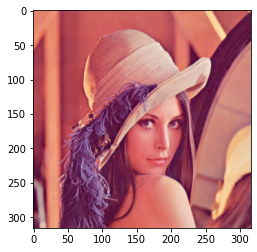

In [12]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline
# 加载原始图片
img = Image.open("./lenna.jpg") 
print(img.size)
plt.imshow(img)

### transforms.CenterCrop(size)

(500, 500)
(224, 224)


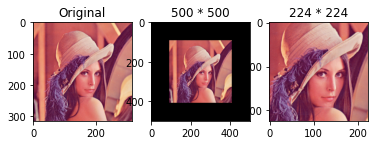

In [13]:
# 对给定图片进行沿中心切割
# 对图片沿中心放大切割，超出图片大小的部分填0
img_centercrop1 = transforms.CenterCrop((500,500))(img)
print(img_centercrop1.size)
# 对图片沿中心缩小切割，超出期望大小的部分剔除
img_centercrop2 = transforms.CenterCrop((224,224))(img)
print(img_centercrop2.size)
plt.subplot(1,3,1),plt.imshow(img),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(img_centercrop1),plt.title("500 * 500")
plt.subplot(1,3,3),plt.imshow(img_centercrop2),plt.title("224 * 224")
plt.show()

### transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)

(316, 316)


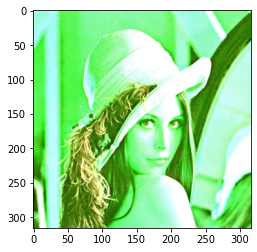

In [14]:
# 对图片的亮度，对比度，饱和度，色调进行改变
img_CJ = transforms.ColorJitter(brightness=1,contrast=0.5,saturation=0.5,hue=0.5)(img)
print(img_CJ.size)
plt.imshow(img_CJ)

### transforms.Grayscale(num_output_channels)


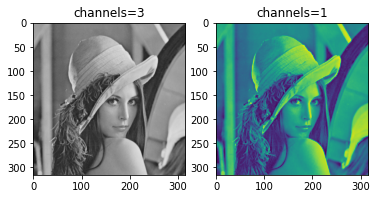

In [15]:
img_grey_c3 = transforms.Grayscale(num_output_channels=3)(img)
img_grey_c1 = transforms.Grayscale(num_output_channels=1)(img)
plt.subplot(1,2,1),plt.imshow(img_grey_c3),plt.title("channels=3")
plt.subplot(1,2,2),plt.imshow(img_grey_c1),plt.title("channels=1")
plt.show()

### transforms.Resize

(224, 224)


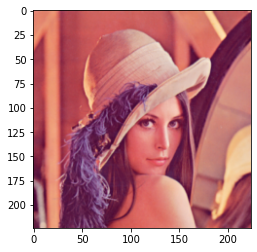

In [16]:
# 等比缩放
img_resize = transforms.Resize(224)(img)
print(img_resize.size)
plt.imshow(img_resize)

### transforms.Scale


(224, 224)


c:\ProgramData\Anaconda3\envs\torch_py37\lib\site-packages\torchvision\transforms\transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


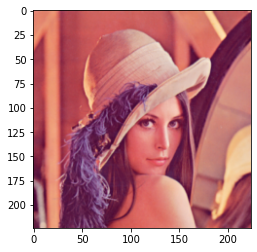

In [17]:
# 等比缩放 不推荐使用此转换以支持调整大小
img_scale = transforms.Scale(224)(img)
print(img_scale.size)
plt.imshow(img_scale)

### transforms.RandomCrop


(224, 224)


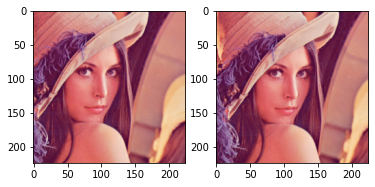

In [18]:
# 随机裁剪成指定大小
# 设立随机种子
import torch
torch.manual_seed(31)
# 随机裁剪
img_randowm_crop1 = transforms.RandomCrop(224)(img)
img_randowm_crop2 = transforms.RandomCrop(224)(img)
print(img_randowm_crop1.size)
plt.subplot(1,2,1),plt.imshow(img_randowm_crop1)
plt.subplot(1,2,2),plt.imshow(img_randowm_crop2)
plt.show()

### transforms.RandomHorizontalFlip


(316, 316)


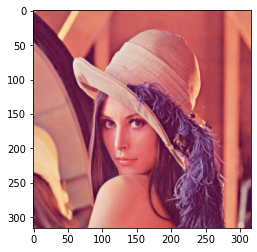

In [19]:
# 随机左右旋转
# 设立随机种子，可能不旋转
import torch
torch.manual_seed(31)

img_random_H = transforms.RandomHorizontalFlip()(img)
print(img_random_H.size)
plt.imshow(img_random_H)

### transforms.RandomVerticalFlip


(316, 316)


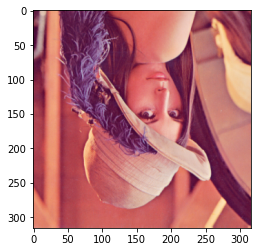

In [20]:
# 随机垂直方向旋转
img_random_V = transforms.RandomVerticalFlip()(img)
print(img_random_V.size)
plt.imshow(img_random_V)

### transforms.RandomResizedCrop


(224, 224)


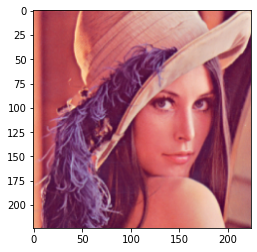

In [21]:
# 随机裁剪成指定大小
img_random_resizecrop = transforms.RandomResizedCrop(224,scale=(0.5,0.5))(img)
print(img_random_resizecrop.size)
plt.imshow(img_random_resizecrop)

### 对图片进行组合变化 tranforms.Compose()

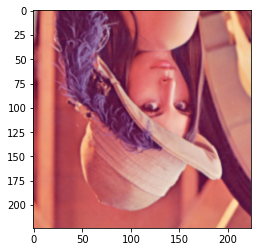

In [22]:
# 对一张图片的操作可能是多种的，我们使用transforms.Compose()将他们组装起来
transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.transforms.RandomResizedCrop((224), scale = (0.5,1.0)),
    transforms.RandomVerticalFlip(),
])
img_transform = transformer(img)
plt.imshow(img_transform)